<a href="https://colab.research.google.com/github/mowmonira123/cse475_project/blob/main/CSE475_Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/data/train.csv')
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
data.shape

(20800, 5)

In [ ]:
data=data.dropna()
data.shape

(18285, 5)

In [ ]:
IF=data.drop('label',axis=1)

IF.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [ ]:
DF=data['label']
DF.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
data.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
new_data=data.copy()
new_data.reset_index(inplace=True)
new_data.head(5)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
corpus = []

for i in range(0,len(new_data)):
    review = re.sub('[^a-zA-Z]', ' ', new_data['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
  
   

In [ ]:
corpus[3]

'video civilian kill singl us airstrik identifi rate civilian kill american airstrik afghanistan higher us engag activ combat oper photo hellfir missil load onto us militari reaper drone afghanistan staff sgt brian ferguson u air forc bureau abl identifi civilian kill singl us drone strike afghanistan last month biggest loss civilian life one strike sinc attack medecin san frontier hospit msf last octob us claim conduct counter terror strike islam state fighter hit nangarhar provinc missil septemb next day unit nation issu unusu rapid strong statement say strike kill civilian injur other gather hous celebr tribal elder return pilgrimag mecca bureau spoke man name haji rai said owner hous target said peopl kill other injur provid name list bureau abl independ verifi ident die rai son headmast local school among anoth man abdul hakim lost three son attack rai said involv deni us claim member visit hous strike said even speak sort peopl phone let alon receiv hous death amount biggest conf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
IF=tfidf_v.fit_transform(corpus).toarray()

In [ ]:
IF.shape

(18285, 5000)

In [ ]:
DF=new_data['label']

In [ ]:
from sklearn.model_selection import train_test_split
IF_train, IF_test, DF_train, DF_test = train_test_split(IF, DF, test_size=0.33, random_state=0)

In [ ]:
tfidf_v.get_feature_names()[:10]

['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc']

In [ ]:
count_df = pd.DataFrame(IF_train, columns=tfidf_v.get_feature_names())
count_df.head()

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,absolut,absorb,absurd,abu,abus,academ,academi,acceler,accept,access,access pipelin,accid,accommod,accompani,accomplish,accord,accord report,account,accumul,accur,accus,achiev,acid,acknowledg,acquir,acr,across,across countri,act,action,...,written,wrong,wrongdo,wrote,wrote twitter,www,xi,yahoo,yard,ye,yeah,year,year ago,year later,year mr,year old,year said,year sinc,yell,yellow,yemen,yesterday,yet,yet anoth,yiannopoulo,yield,york,york citi,york time,yorker,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.054002,0.0,0.000000,0.0,0.200698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.053056,0.054919,0.055677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017844,0.036376,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.235377,0.028303,0.0,0.037869,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.014089,0.0,0.00000,0.009599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076513,0.008209,0.0,0.0,0.010306,0.0,0.0,0.0,0.0,0.0,0.0,0.006608,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039097,0.0,0.053839,0.000000,0.0,0.05569,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.215889,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## **MultinomialNB Algorithm**



In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.900
Confusion matrix, without normalization


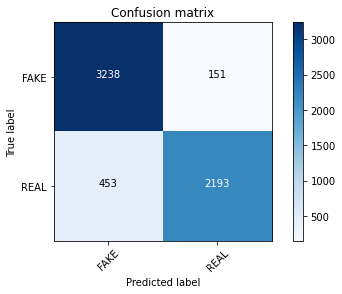

In [ ]:
classifier.fit(IF_train, DF_train)
pred = classifier.predict(IF_test)
score = metrics.accuracy_score(DF_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(DF_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
NB_accuracy = round(score*100,2)

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(IF_train,DF_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_lr=LR.predict(IF_test)

In [ ]:
LR.score(IF_test, DF_test)

0.9502899751449876

accuracy:   0.950 
Confusion matrix, without normalization


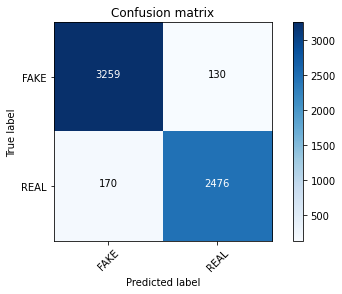

In [ ]:
LR.fit(IF_train, DF_train)
pred = LR.predict(IF_test)
score = metrics.accuracy_score(DF_test, pred)
print("accuracy:   %0.3f " % score)
cm = metrics.confusion_matrix(DF_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
LR_accuracy = round(score*100,2)

# **Passive Aggressive**

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.950
Confusion matrix, without normalization


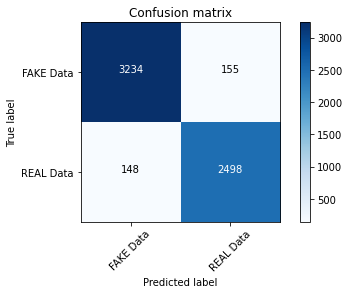

In [ ]:
linear_clf.fit(IF_train, DF_train)
pred = linear_clf.predict(IF_test)
score = metrics.accuracy_score(DF_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(DF_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])
PA_accuracy = round(score*100,2)

# **Compare accuracy**

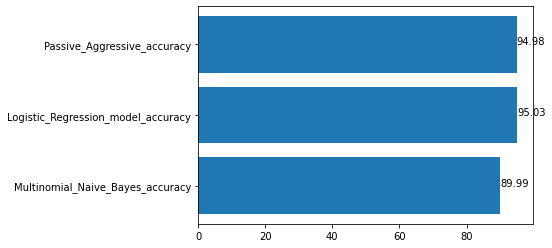

In [ ]:
import matplotlib.pyplot as plt

x = ["Multinomial_Naive_Bayes_accuracy", "Logistic_Regression_model_accuracy", "Passive_Aggressive_accuracy"]
y =  [NB_accuracy, LR_accuracy, PA_accuracy]
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index, str(value))